In [1]:
# based on <https://github.com/leelabcnbc/thesis-yimeng-v1/blob/master/results_ipynb/yuanyuan_8k_a_3day/transfer_learning_factorized_vgg.ipynb>

In [2]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training_extra.transfer_learning.meta import fetch_meta
from thesis_v2.training_extra.transfer_learning.analysis import collect_one_setting

In [4]:
folder_to_check = 'scripts/training/yuanyuan_8k_a_3day/transfer_learning_factorized_vgg'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit import param_iterator, sparse_list, feature_file_name
from key_utils import keygen

num_sparse = len(sparse_list)

In [5]:
def load_everything():
    _df_collect = []
    argmax_all = []
    for idx, param in enumerate(param_iterator(include_sparse=False)):
        if idx % 5 == 0:
            print(idx)
        
        assert param['act_fn'] == 'softplus' and param['split_seed'] == 'legacy' and param['model_seed'] == 0
        
        # get meta
        with h5py.File(feature_file_name, 'r') as f_feature:
            meta_this = fetch_meta(f_feature['a/' + param['suffix']], 'a/' + param['suffix'])
        assert meta_this['dataset'] == 'a'
        assert meta_this['layer_unroll'] == 0
        
        performance_result = collect_one_setting(
            sparse_list = sparse_list,
            keygen=keygen,
            param=param,
        )
       
        _df_collect.append({
            'network': meta_this['network'],
            'scale,loss': f"{meta_this['setting']},{param['loss_type']}",
            'layer': '{:02d}.{}'.format(meta_this['layer_idx'], meta_this['layer_name']),
            'corr_test': performance_result['test_best'].mean(),
        })
        
        # which sparsity setting is used.
        argmax_all.append(performance_result['argmax'])
        
    argmax_all = np.concatenate(argmax_all, axis=0)
    # looks good. most neurons select middle ones.
    
    # remove -1 ones.
    argmax_all = argmax_all[argmax_all!=-1]
    print(np.bincount(argmax_all)/argmax_all.size)

    _df =  pd.DataFrame(_df_collect, columns=['network', 'scale,loss', 'layer', 'corr_test'])
    _df = _df.set_index(['network', 'scale,loss', 'layer'], verify_integrity=True)
    return _df

In [6]:
df = load_everything()

['vgg11/half/1.0', 'vgg11/half/2.0', 'vgg11/half/3.0', 'vgg11/half/4.0', 'vgg11/half/5.0', 'vgg11/half/6.0', 'vgg11/quarter/1.0', 'vgg11/quarter/2.0', 'vgg11/quarter/3.0', 'vgg11/quarter/4.0', 'vgg11/quarter/5.0', 'vgg11/quarter/6.0', 'vgg11_bn/half/1.0', 'vgg11_bn/half/2.0', 'vgg11_bn/half/3.0', 'vgg11_bn/half/4.0', 'vgg11_bn/half/5.0', 'vgg11_bn/half/6.0', 'vgg11_bn/quarter/1.0', 'vgg11_bn/quarter/2.0', 'vgg11_bn/quarter/3.0', 'vgg11_bn/quarter/4.0', 'vgg11_bn/quarter/5.0', 'vgg11_bn/quarter/6.0', 'vgg16/half/2.0', 'vgg16/half/3.0', 'vgg16/half/4.0', 'vgg16/half/5.0', 'vgg16/half/6.0', 'vgg16/half/7.0', 'vgg16/half/8.0', 'vgg16/half/9.0', 'vgg16/quarter/2.0', 'vgg16/quarter/3.0', 'vgg16/quarter/4.0', 'vgg16/quarter/5.0', 'vgg16/quarter/6.0', 'vgg16/quarter/7.0', 'vgg16/quarter/8.0', 'vgg16/quarter/9.0', 'vgg16_bn/half/2.0', 'vgg16_bn/half/3.0', 'vgg16_bn/half/4.0', 'vgg16_bn/half/5.0', 'vgg16_bn/half/6.0', 'vgg16_bn/half/7.0', 'vgg16_bn/half/8.0', 'vgg16_bn/half/9.0', 'vgg16_bn/quart

In [7]:
df
# results match old file.

corr_test
network  scale,loss      layer                
vgg11    half,poisson    01.pool1     0.487056
         half,mse        01.pool1     0.486747
         half,poisson    02.conv2_1        NaN
         half,mse        02.conv2_1        NaN
         half,poisson    03.pool2     0.550874
         half,mse        03.pool2     0.548774
         half,poisson    04.conv3_1   0.559793
         half,mse        04.conv3_1   0.558721
         half,poisson    05.conv3_2   0.546895
         half,mse        05.conv3_2   0.545067
         half,poisson    06.pool3     0.537138
         half,mse        06.pool3     0.536402
         quarter,poisson 01.pool1     0.491367
         quarter,mse     01.pool1     0.489221
         quarter,poisson 02.conv2_1   0.521204
         quarter,mse     02.conv2_1   0.520795
         quarter,poisson 03.pool2     0.515791
         quarter,mse     03.pool2     0.515407
         quarter,poisson 04.conv3_1   0.509031
         quarter,mse     04.conv3_1   0.508399
         quarter,poisson 05.conv3_2   0.480944
         quarter,mse     05.conv3_2   0.480686
         quarter,poisson 06.pool3     0.453635
         quarter,mse     06.pool3     0.452101
vgg11_bn half,poisson    01.pool1          NaN
         half,mse        01.pool1          NaN
         half,poisson    02.conv2_1        NaN
         half,mse        02.conv2_1        NaN
         half,poisson    03.pool2     0.556711
         half,mse        03.pool2     0.556281
         half,poisson    04.conv3_1   0.561210
         half,mse        04.conv3_1   0.560477
         half,poisson    05.conv3_2   0.548151
         half,mse        05.conv3_2   0.548001
         half,poisson    06.pool3     0.540125
         half,mse        06.pool3     0.538920
         quarter,poisson 01.pool1     0.489165
         quarter,mse     01.pool1     0.485629
         quarter,poisson 02.conv2_1   0.524572
         quarter,mse     02.conv2_1   0.522482
         quarter,poisson 03.pool2     0.517411
         quarter,mse     03.pool2     0.517262
         quarter,poisson 04.conv3_1   0.508259
         quarter,mse     04.conv3_1   0.508212
         quarter,poisson 05.conv3_2   0.476419
         quarter,mse     05.conv3_2   0.476460
         quarter,poisson 06.pool3     0.448924
         quarter,mse     06.pool3     0.447924
vgg16    half,poisson    02.pool1     0.519152
         half,mse        02.pool1     0.516585
         half,poisson    03.conv2_1        NaN
         half,mse        03.conv2_1        NaN
         half,poisson    04.conv2_2        NaN
         half,mse        04.conv2_2        NaN
         half,poisson    05.pool2     0.543787
         half,mse        05.pool2     0.542854
         half,poisson    06.conv3_1        NaN
         half,mse        06.conv3_1        NaN
         half,poisson    07.conv3_2   0.536725
         half,mse        07.conv3_2   0.536084
         half,poisson    08.conv3_3   0.516580
         half,mse        08.conv3_3   0.515082
         half,poisson    09.pool3     0.506767
         half,mse        09.pool3     0.506004
         quarter,poisson 02.pool1     0.507177
         quarter,mse     02.pool1     0.504880
         quarter,poisson 03.conv2_1   0.515001
         quarter,mse     03.conv2_1   0.514624
         quarter,poisson 04.conv2_2   0.514938
         quarter,mse     04.conv2_2   0.512587
         quarter,poisson 05.pool2     0.505164
         quarter,mse     05.pool2     0.504475
         quarter,poisson 06.conv3_1   0.501924
         quarter,mse     06.conv3_1   0.501602
         quarter,poisson 07.conv3_2   0.465453
         quarter,mse     07.conv3_2   0.464926
         quarter,poisson 08.conv3_3   0.407498
         quarter,mse     08.conv3_3   0.405456
         quarter,poisson 09.pool3     0.383824
         quarter,mse     09.pool3     0.383889
vgg16_bn half,poisson    02.pool1     0.518712
         half,mse        02.pool1     0.521288
         half,poisson    03.conv2_1        NaN
         half,mse        03.conv2_1       

In [8]:
# for loop visualize every thing.

def visualize():
    df_corr_only = df['corr_test']
    for net in df_corr_only.index.get_level_values('network').unique():
        print(net)
        plt.close('all')
        df_this = df_corr_only.xs(net, level='network')
        df_this.unstack('scale,loss').sort_index().plot(rot=45)
        plt.show()

vgg11


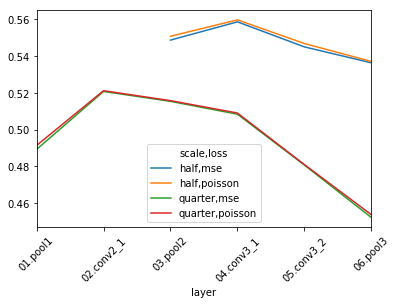

vgg11_bn


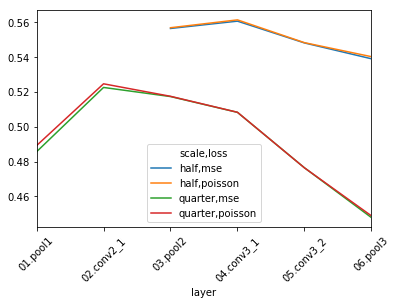

vgg16


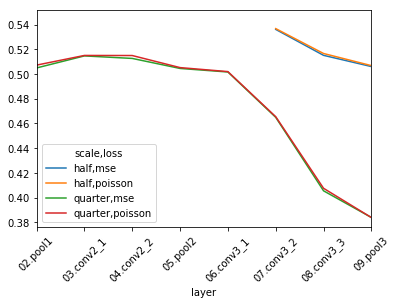

vgg16_bn


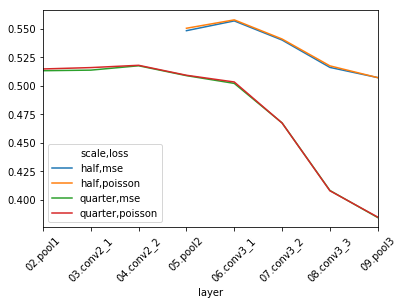

In [9]:
visualize()